# CT 복원영상에서 폐, 기도, 심장을 가이드 해주는 딥러닝 모델 만들기

# 1. CT이미지 데이터셋 살펴보기

In [1]:
import os
import pandas as pd

In [3]:
data_dir = "./DATASET/Segmentation/"
data_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
data_df.head()

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg


In [4]:
data_df.shape

(16708, 2)

In [5]:
data_df.head(50)

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
5,ID00007637202177411956430_5.jpg,ID00007637202177411956430_mask_5.jpg
6,ID00007637202177411956430_6.jpg,ID00007637202177411956430_mask_6.jpg
7,ID00007637202177411956430_7.jpg,ID00007637202177411956430_mask_7.jpg
8,ID00007637202177411956430_8.jpg,ID00007637202177411956430_mask_8.jpg
9,ID00007637202177411956430_9.jpg,ID00007637202177411956430_mask_9.jpg


데이터는 총 16700개가 있는데 동일한 ID에 대해서 약 30개의 이미지가 있는것으로 보인다.

In [7]:
# 이미지 아이디를 기준으로 그룹화해서 이 하위 데이터 쌍들을 모두 불러오기
def extract_client_id(x):
    return x.split("_")[0]

data_df['id'] = data_df.ImageId.apply(lambda x:extract_client_id(x))

In [8]:
data_df

,ImageId,MaskId,id
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg,ID00007637202177411956430
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg,ID00007637202177411956430
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg,ID00007637202177411956430
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg,ID00007637202177411956430
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg,ID00007637202177411956430
...,...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg,ID00426637202313170790466
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg,ID00426637202313170790466
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg,ID00426637202313170790466
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg,ID00426637202313170790466


In [9]:
# 아이디 간의 중복을 제거하고 전체적인 고객이 몇 명인지를 확인해보자
import numpy as np

In [10]:
client_ids = np.unique(data_df.id.values)
print(len(client_ids))

112


In [15]:
client_ids

array(['ID00007637202177411956430', 'ID00009637202177434476278',
       'ID00010637202177584971671', 'ID00012637202177665765362',
       'ID00014637202177757139317', 'ID00015637202177877247924',
       'ID00019637202178323708467', 'ID00025637202179541264076',
       'ID00027637202179689871102', 'ID00032637202181710233084',
       'ID00035637202182204917484', 'ID00047637202184938901501',
       'ID00048637202185016727717', 'ID00051637202185848464638',
       'ID00060637202187965290703', 'ID00061637202188184085559',
       'ID00068637202190879923934', 'ID00072637202198161894406',
       'ID00073637202198167792918', 'ID00075637202198610425520',
       'ID00076637202199015035026', 'ID00077637202199102000916',
       'ID00082637202201836229724', 'ID00089637202204675567570',
       'ID00090637202204766623410', 'ID00094637202205333947361',
       'ID00102637202206574119190', 'ID00104637202208063407045',
       'ID00105637202208831864134', 'ID00109637202210454292264',
       'ID001106372022106

112명의 클라이언트가 있다. </br>
그래서 112명에 대한 CT 복원 이미지가 순차적으로 연결되어 있고 이것을 통해 하나의 영상을 만들 수 있다.

In [12]:
# 이미지, 마스크를 하나의 페어로 해서 조금 더 디테일하게 어떤 이미지를 갖고 있는지 살펴보자.
import cv2
import matplotlib.pyplot as plt

In [18]:
# 클라이언트 리스트의 0번째 인덱스에 해당하는 데이터 프레임을 불러오기
index = 0
client_data = data_df[data_df.id == client_ids[index]][["ImageId", "MaskId"]]

In [19]:
# 첫번째에 해당하는 모든 순차적인 이미지 데이터셋을 불러와라
client_data

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
5,ID00007637202177411956430_5.jpg,ID00007637202177411956430_mask_5.jpg
6,ID00007637202177411956430_6.jpg,ID00007637202177411956430_mask_6.jpg
7,ID00007637202177411956430_7.jpg,ID00007637202177411956430_mask_7.jpg
8,ID00007637202177411956430_8.jpg,ID00007637202177411956430_mask_8.jpg
9,ID00007637202177411956430_9.jpg,ID00007637202177411956430_mask_9.jpg


마스크 이미지, CT 영상으로 복원할 수 있는 이미지의 개수가 30개인것을 확인할 수 있다. </br>
index=1로 바꾸면 두번째는 394개를 가지고 있다.

sub_index 값 바꿔가면서 영상 확인해보기

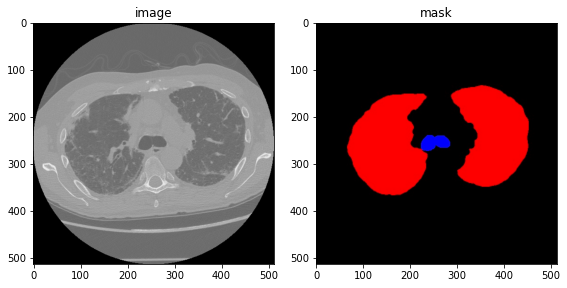

In [23]:
sub_index = 11
img_name, mask_name = client_data.iloc[sub_index].values
img_path = os.path.join(data_dir, "images", img_name)
mask_path = os.path.join(data_dir, "masks", mask_name)

image = cv2.imread(img_path)
mask = cv2.imread(mask_path)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title("image")
plt.imshow(image)

plt.subplot(122)
plt.title("mask")
plt.imshow(mask)
plt.tight_layout()

In [26]:
# 순자척인 이미지인지 영상으로 만들어서 확인해보기
def get_client_data(data_df, index):
    client_ids = np.unique(data_df.id.values)
    client_id = client_ids[index]
    client_data = data_df[data_df.id == client_id]
    image_files = list(client_data["ImageId"])
    mask_files = list(client_data["MaskId"])
    return client_id, image_files, mask_files
# 특정 클라이언트가 촬영한 이미지와 마스크 데이터를 리스트 형태로 반환하는 함수

In [28]:
# 색깔 지정해주기
regions = ["background", "trachea", "heart", "lung"]
colors = ((0,0,0), (255,0,0), (0,255,0), (0,0,255)) # opencv 는 컬러 스페이스가 BGR임.
'''
segmentation 같은 경우에는 classification, detection, pose estimation 이런 부분과 좀 다르게
백그라운드에 대한 정보도 반드시 필요하다.
'''

'\nsegmentation 같은 경우에는 classification, detection, pose estimation 이런 부분과 좀 다르게\n백그라운드에 대한 정보도 반드시 필요하다.\n'

In [32]:
index = 0
client_id, image_files, mask_files = get_client_data(data_df, index)
print("client_id: ", client_id)

# 이미지들을 영상으로 만들어보기
canvas = np.zeros(shape=(512, 2*512*50, 3), dtype=np.uint8)
# 이미지를 순차적으로 불러와서 영상으로 띄워보기
for i in range(len(image_files)):
    image = cv2.imread(os.path.join(data_dir, "images", image_files[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(data_dir, "masks", mask_files[i]))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    # 파일 형태가 jpeg인데 엣지 부위가 픽셀이 오염됐기 때문에 임계값으로 변경
    # 명확하게 바이너리 형태로, 세그먼트 가능한 픽셀 단위의 클래시피케이션이 가능하도록 벨류값을 정리
    thres = 240
    mask[mask < thres] = 0
    mask[mask >= thres] = 255
    
    # 왼쪽부터 512까지는 이미지로 채울거고, 50의 공간을 띄우고 mask로 채움.
    canvas[:, 0:512, :] = image
    canvas[:, 512+50:2*512+50, :] = mask
    
    text_buff = 410 # 각각의 단어간에 마진을 두고 첫 위치를 text_buff에 담아서 출력
    for j in range(1, len(regions)):
        cv2.putText(canvas, f'{regions[j].upper()}', (900, text_buff), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[j], 2)
        text_buff += 40
        
    cv2.imshow("CT frames", canvas)
    key = cv2.waitKey(200)
    if key == 27:
        break
cv2.destroyAllWindows()

client_id:  ID00007637202177411956430


# 2. 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기